# DATA ANALYSIS

### Data upload

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load & view the data
df = pd.read_csv('D:/project/retail_sales_clean.csv')
df.head()

,Unnamed: 0,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,City,Region,Country,Occupation,Income Level,Membership Type,Latitude,Longitude
0,0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Boston,West,USA,Salesperson,Medium,VIP,42.3601,-71.0589
1,1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Houston,Midwest,USA,Lawyer,Medium,New Customer,29.7604,-95.3698
2,2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,San Francisco,Northeast,USA,Business Analyst,Low,VIP,37.7749,-122.4194
3,3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Boston,Northeast,USA,Student,Low,New Customer,42.3601,-71.0589
4,4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Chicago,Northeast,USA,Student,Medium,VIP,41.8781,-87.6298


### Create functions for data analysis

In [5]:
# Create Visualize distribution function for single bar chart
def sgl_dis(col):
    sns.countplot(data=df, x=col, palette='coolwarm', order = df[col].value_counts().index)
    plt.title(f'Customer Distribution by {col}')
    plt.xticks(rotation=90)
    plt.show()

In [6]:
## Create Visualize distribution function of group bar chart
def grp_dis(col1, col2):
    sns.countplot(data=df, x=col1, hue=col2, palette='coolwarm', order = df[col1].value_counts().index)
    plt.title(f'{col1} level distribution by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [31]:
# Create Visualize boxplot function to identify factors that influence spending patterns
def totalamount(col):
    sns.boxplot(data=df, x=col, y="Total Amount", palette="coolwarm", order=df[col].value_counts().index)
    plt.title(f'Total Spending by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# Create Visualize plot function to dentify factors customers group by Spending
def avgspend(col):
    avg_spending = df.groupby(col)['Total Amount'].mean().sort_values()
    colors = sns.color_palette('coolwarm', len(avg_spending)) # Set color palette using Seaborn
# Plot the results
    plt.figure(figsize=(8, 5))
    avg_spending.plot(kind="bar", color=colors, edgecolor="black")
# Formatting
    plt.title(f'Average Spending by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Total Spending ($)')
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
# Show the plot
    plt.show()

In [85]:
def spending(col, metric):
    if metric == 'mean':
        spending =  df.groupby(col)['Total Amount'].mean().sort_values()
    elif metric == 'sum':
        spending = df.groupby(col)['Total Amount'].sum().sort_values()
    else:
        raise ValueError("Invalid metric! Choose from 'sum', or 'mean'")
    colors = sns.color_palette('coolwarm', len(spending)) # Set color palette using Seaborn
# Plot the results
    plt.figure(figsize=(8, 5))
    spending.plot(kind="bar", color=colors, edgecolor="black")
# Formatting
    plt.title(f'{metric} Spending by {col}')
    plt.xlabel(col)
    plt.ylabel(f'{col} Spending ($)')
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
# Show the plot
    plt.show()

In [9]:
# Create Flexible Summary Table Function
def summarize_data(df, group_by, column, metric):
    if metric == 'count':
        table = pd.crosstab(df[group_by], df[column])
    elif metric == 'percent':
        table = pd.crosstab(df[group_by], df[column], normalize='index') * 100
    elif metric == 'sum':
        table = df.groupby(group_by)[column].sum().reset_index()
    elif metric == 'mean':
        table = df.groupby(group_by)[column].mean().reset_index()
    else:
        raise ValueError("Invalid metric! Choose from 'count', 'percent', 'sum', or 'mean'")
    return table

## Exploratory Data Analysis (EDA)
- Summary Statistics: Analyze describe() for numerical data.
- Visualize Income Distribution & Customer Segments using bar plots.
- Check Correlations between spending patterns and customer attributes.

In [11]:
# Summary Statistics
df.describe()

,Unnamed: 0,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Latitude,Longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,500.500000,41.39200,2.514000,179.890000,456.000000,37.070436,-95.831132
std,288.819436,288.819436,13.68143,1.132734,189.681356,559.997632,6.808978,20.091983
min,0.000000,1.000000,18.00000,1.000000,25.000000,25.000000,25.761700,-122.419400
25%,249.750000,250.750000,29.00000,1.000000,30.000000,60.000000,29.760400,-118.243700
50%,499.500000,500.500000,42.00000,3.000000,50.000000,135.000000,37.774900,-95.369800
75%,749.250000,750.250000,53.00000,4.000000,300.000000,900.000000,41.878100,-74.006000
max,999.000000,1000.000000,64.00000,4.000000,500.000000,2000.000000,47.606200,-71.058900


key insights from the summary statistics:

Transaction ID:
Mean: 500.5 → IDs are sequential.
Std Dev: 288.8 → Spread is consistent.
Min-Max: 1 - 1000 → Likely 1000 transactions.

Age:
Mean: 41.39 years.
Std Dev: 13.68 → Age varies significantly.
Min-Max: 18 - 64 years → No extreme outliers, customer base is adult.

Quantity Purchased:
Mean: 2.51.
Min-Max: 1 - 4 → Customers typically buy in small quantities.

Price per Unit:
Mean: 179.89.
Std Dev: 189.68 → High variation in product pricing.
Min-Max: 25 - $500 → Broad pricing range.

Total Amount Spent:
Mean: 456.
Std Dev: 559.99 → Large variability in total spending.
Min-Max: 25 - 2000 → Some high-value purchases.

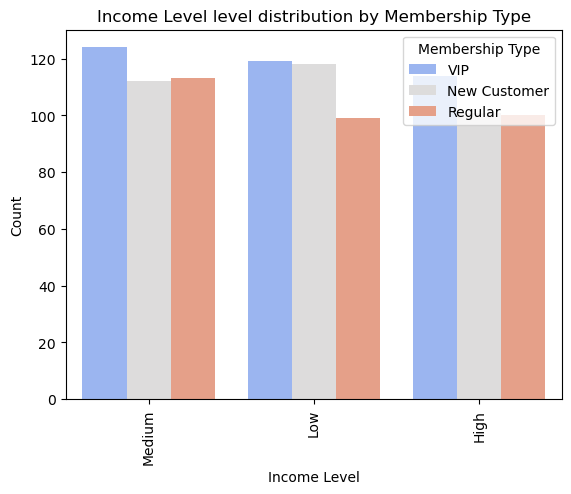

In [14]:
# Visualize Income Level Distribution & Customer Segments
grp_dis('Income Level', 'Membership Type')

In [15]:

# summary tables
count_table = summarize_data(df, 'Income Level', 'Membership Type', metric='count')
percent_table = summarize_data(df, 'Income Level', 'Membership Type', metric='percent')

# Display tables
print(count_table)
print(percent_table)

Membership Type  New Customer  Regular  VIP
Income Level                               
High                      101      100  114
Low                       118       99  119
Medium                    112      113  124
Membership Type  New Customer    Regular        VIP
Income Level                                       
High                32.063492  31.746032  36.190476
Low                 35.119048  29.464286  35.416667
Medium              32.091691  32.378223  35.530086


##### VIP Customers are well-distributed across all Income Levels
Around 35-36% of customers in each income group are VIP members.
This suggests that the VIP membership is not strongly tied to income level—customers from all backgrounds are willing to engage at this level.

##### "Regular" membership is slightly more common in the Medium-Income group
32.38% of Medium-Income customers are Regular members, compared to 29.46% in Low-Income and 31.75% in High-Income groups.
This may indicate that middle-income customers prefer balancing benefits and costs when choosing memberships.

##### New Customers are more frequent in the Low-Income group
35.12% of Low-Income customers are New Customers, the highest among all income groups.
This suggests that lower-income customers might be newer to the brand, possibly still evaluating their purchasing behavior.

📌 Key Takeaways:
The VIP membership is popular across all income levels, suggesting an effective marketing strategy or compelling membership benefits.
Medium-income customers lean towards "Regular" memberships, possibly indicating a budget-conscious yet engaged segment.
Low-income customers have the highest percentage of "New Customers", highlighting an opportunity to convert them into long-term members.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13896\826196180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="Total Amount", palette="coolwarm", order=df[col].value_counts().index)


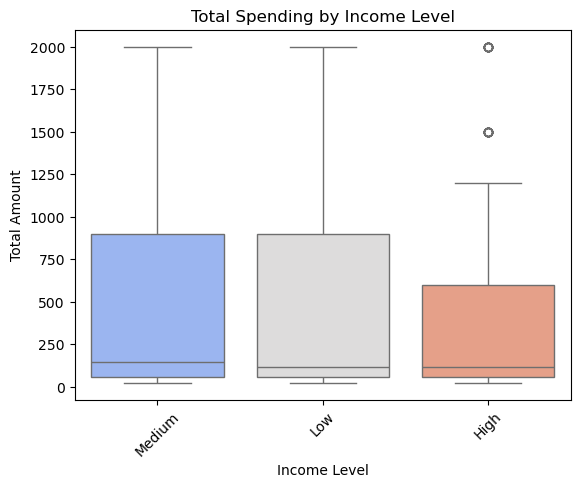

In [41]:
# identify factors that influence spending patterns
totalamount('Income Level')

Observations:
The spending distribution is highly skewed, with some high outliers in each category.

Median spending is relatively low across all income levels.

"Medium" and "Low" income groups have wider interquartile ranges (IQR), suggesting more variation in spending.

The "High" income group appears to have lower spending variability, though some high outliers exist.

Insights:
"Low" & "Medium" income groups have a few big spenders, which might indicate that some lower-income customers still spend significantly.

"High" income customers may not necessarily be the highest spenders, suggesting that income level alone is not the strongest predictor of spending behavior.

Marketing strategies should target high-spending customers within all income levels instead of assuming higher-income customers spend more.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13896\826196180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="Total Amount", palette="coolwarm", order=df[col].value_counts().index)


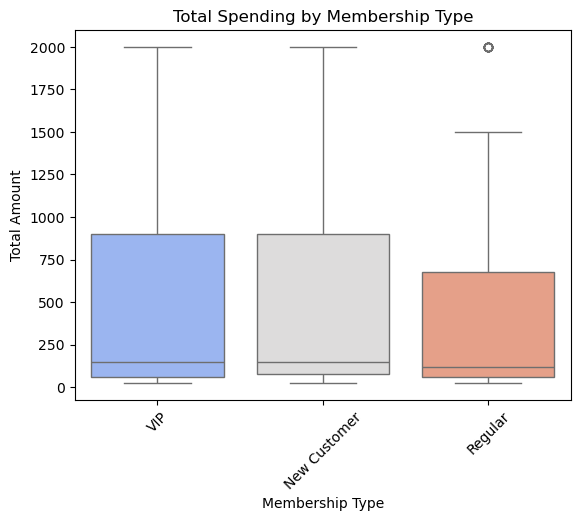

In [44]:
totalamount('Membership Type')

Observations:
"VIP" and "New Customers" have similar spending distributions.

Regular members tend to have a lower median spending compared to VIPs.

There are more extreme outliers in the "Regular" category, which means that while most regular customers spend less, a few spend significantly more.

Insights:
New Customers spend as much as VIPs, meaning early engagement strategies are crucial to retain high-spending new customers.

Regular customers may need loyalty incentives or upselling strategies to encourage them to spend more.

A personalized rewards program could convert high-spending "Regular" customers into VIP members.

## Customer Spending Behavior

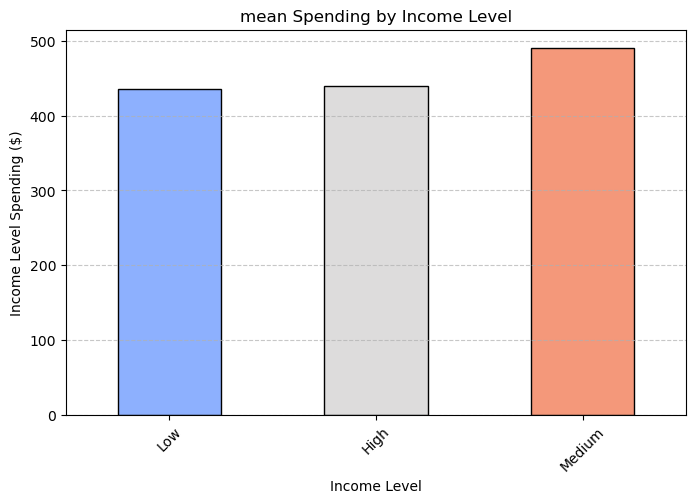

,Income Level,Total Amount
0,High,439.301587
1,Low,435.907738
2,Medium,490.415473


In [87]:
# Average Spending by Income Level
spending('Income Level','mean')
summarize_data(df, 'Income Level','Total Amount', 'mean')

From the bar chart and data table, we can draw the following insights:

Medium Income Level Customers Spend the Most

Customers with a Medium income level have the highest average total spending of approximately $490.42.

Low and High Income Levels Have Similar Spending Patterns

Customers with Low income have an average spending of around $435.91.

Customers with High income have an average spending of $439.30, which is very close to the Low-income group's spending.

This suggests that having a higher income does not necessarily mean higher spending in this dataset.

Possible Interpretations
Spending Behavior Is Not Directly Correlated with Income Level:

The highest spending group is Medium Income, not High Income, which may indicate that:

Medium-income customers feel more financially comfortable to spend.

High-income customers may save or invest more instead of spending on retail.

Marketing Implications:

If the business wants to increase sales, targeting the Medium Income segment with promotions or loyalty programs could be beneficial.

High-income customers may need exclusive or premium product offerings to increase spending.

Low-income customers could respond well to discounts or installment payment options.

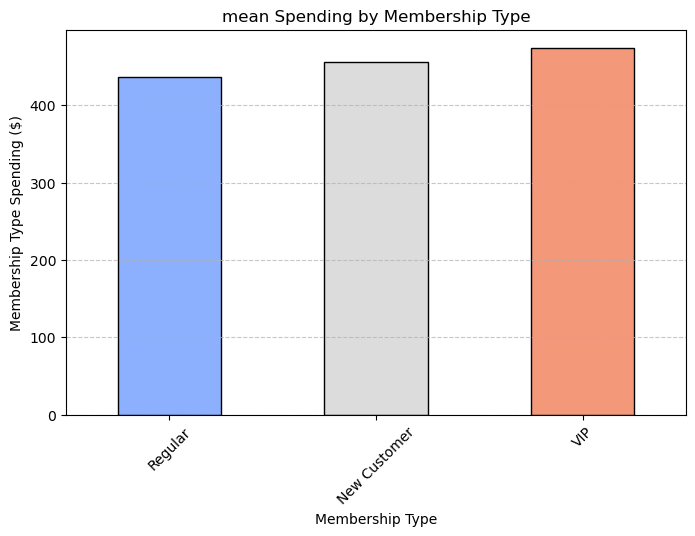

,Membership Type,Total Amount
0,New Customer,455.528701
1,Regular,435.929487
2,VIP,473.977591


In [91]:
# Average Spending by Membership Type
spending('Membership Type', 'mean')
summarize_data(df, 'Membership Type','Total Amount', 'mean')

Spending trends by membership type show that VIP customers have the highest average spending, followed by New Customers and then Regular customers. This suggests that VIP members, who may receive exclusive offers or benefits, tend to spend more on average than other groups. It would be useful to analyze if certain product categories or promotions drive this spending behavior.

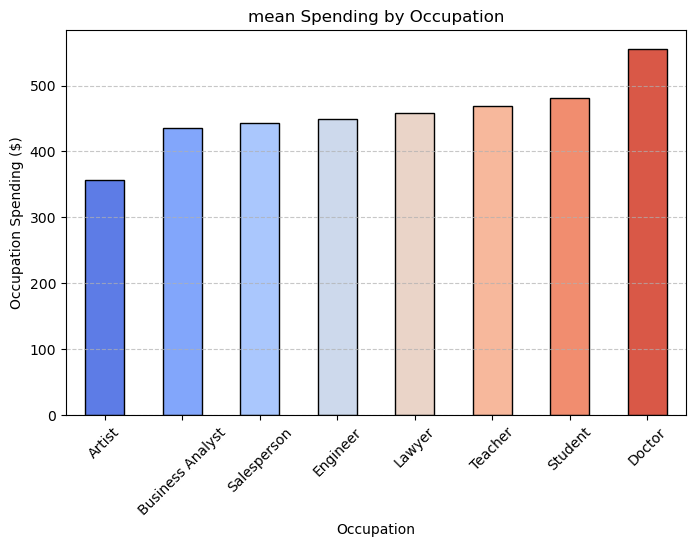

,Occupation,Total Amount
0,Artist,356.297710
1,Business Analyst,435.000000
2,Doctor,556.203008
3,Engineer,448.538462
4,Lawyer,458.319672
5,Salesperson,443.292683
6,Student,481.218487
7,Teacher,469.743590


In [89]:
# Average Spending by Occupation
spending('Occupation','mean')
summarize_data(df, 'Occupation','Total Amount', 'mean')

Doctors have the highest average spending (~$556), likely due to higher income levels and spending habits.

Students and Teachers also spend relatively high amounts (~$481 and ~$470), possibly due to educational and professional needs.

Artists have the lowest spending (~$356), which might reflect income variability or different spending priorities.

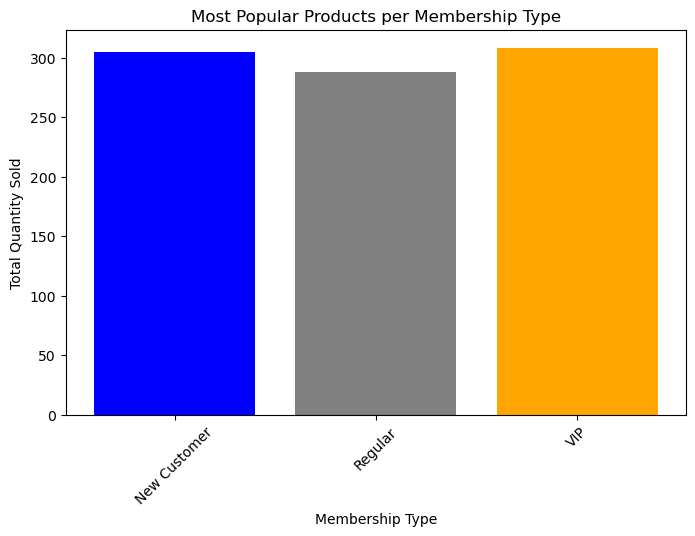

  Membership Type Product Category  Quantity
2    New Customer      Electronics       305
4         Regular         Clothing       288
7             VIP         Clothing       308


In [107]:
# Most Popular Product Category per Membership Type
# Group by Membership Type and Product Category, then sum quantity
popular_products = df.groupby(['Membership Type', 'Product Category'])['Quantity'].sum().reset_index()

# Find the most popular product per segment
most_popular = popular_products.loc[popular_products.groupby('Membership Type')['Quantity'].idxmax()]

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(most_popular['Membership Type'], most_popular['Quantity'],color=['blue', 'gray', 'orange'])
plt.xlabel('Membership Type')
plt.ylabel('Total Quantity Sold')
plt.title('Most Popular Products per Membership Type')
plt.xticks(rotation=45)
plt.show()

# Display the most popular products
print(most_popular)

New Customers Prefer Electronics

Electronics is the top-selling category for new customers, with 305 units sold.

This suggests that new customers may be tech-savvy or prefer purchasing gadgets when they first join.

Regular and VIP Members Prefer Clothing

Regular customers bought 288 units of Clothing, while VIP members bought 308 units.

This indicates that long-term customers are more engaged in fashion-related purchases.

Overall Trend

Electronics is more appealing to new customers, while clothing dominates among returning customers.

VIP members tend to buy slightly more than regular members, which aligns with expectations that high-tier members are more engaged shoppers.

Potential Business Actions:
For New Customers:

Offer targeted discounts on electronics to encourage repeat purchases.

Use personalized marketing to recommend complementary products (e.g., accessories, warranties).

For Regular & VIP Members:

Provide exclusive clothing promotions or loyalty rewards to maintain engagement.

Create VIP-only fashion collections or early access to new clothing lines.

## Geographic Insights
- Map Customer Transactions using Latitude & Longitude
- Find Regional Sales Trends
- Visualize High-Spending Areas

In [120]:
# Heatmap of Customer Transactions
!pip install folium pandas
import folium
from folium.plugins import HeatMap

# Define the initial location (center of the dataset)
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
# Create a Heatmap
heatmap = folium.Map(location=map_center, zoom_start=10)

# Add Heatmap Layer
HeatMap(df[['Latitude', 'Longitude', 'Total Amount']].values).add_to(heatmap)

heatmap

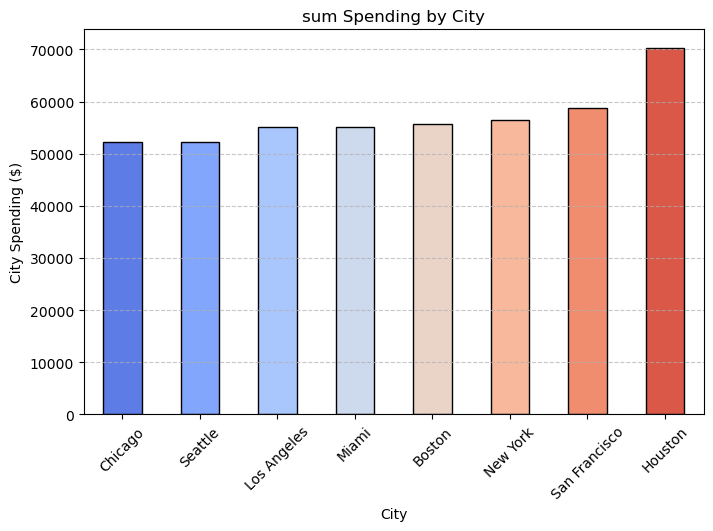

,City,Total Amount
0,Boston,55625
1,Chicago,52250
2,Houston,70340
3,Los Angeles,55055
4,Miami,55170
5,New York,56520
6,San Francisco,58765
7,Seattle,52275


In [122]:
spending('City','sum')
summarize_data(df, 'City','Total Amount', 'sum')

Key Insights:
Top-Spending City:

Houston has the highest total spending at $70,340, significantly higher than other cities.

Mid-Tier Cities:

San Francisco 58,765 and New York 56,520 show strong spending, indicating high consumer activity.

Boston 55,625, Miami 55,170, and Los Angeles 55,055 follow closely, suggesting relatively balanced spending patterns.

Lower Spending Cities:

Chicago 52,250 and Seattle 52,275 have the lowest spending totals in this dataset.

The difference between these cities and the highest spender (Houston) is notable, implying variations in purchasing power, store availability, or customer engagement.

Potential Business Actions:
Target Houston for Growth: Given the highest sales volume, Houston could be a prime market for expanding promotions, loyalty programs, or premium offerings.

Boost Sales in Chicago & Seattle: Investigating lower spending in these cities can help identify potential improvements—whether in marketing, pricing, or customer incentives.

Maintain Competitive Edge in Mid-Tier Cities: Since Boston, Miami, and Los Angeles show steady spending, continued engagement strategies should focus on retaining customers and upselling opportunities.

In [136]:
# Visualize High-Spending Area -> by tableau

## Customer Loyalty & Segmentation Analysis
- Customer Retention by Membership Type (VIP, Regular, New Customer)
- Identify High-Value Customers
- Analyze Purchase Frequency by Customer Type

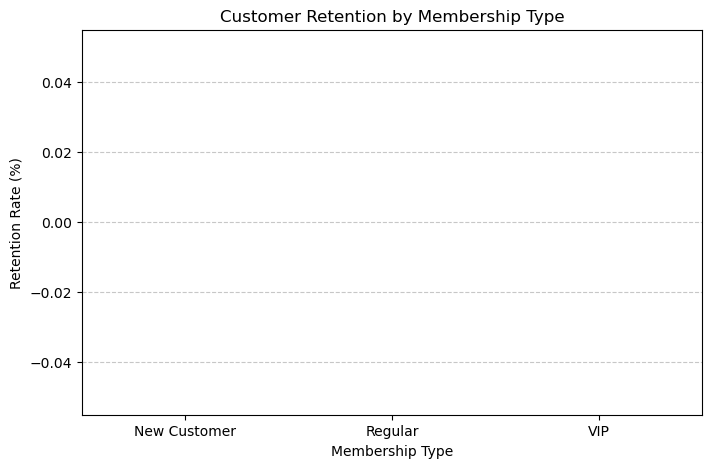

In [147]:
# Customer Retention by Membership Type (VIP, Regular, New Customer)
## Define retention (Customers who made purchases after 6 months)

df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
# Get first and last purchase date for each customer
customer_lifecycle = df.groupby('Customer ID').agg(
    First_Purchase=('Date', 'min'),
    Last_Purchase=('Date', 'max'),
    Membership_Type=('Membership Type', 'first')  # Keep the first membership type
).reset_index()

# Define retention: Customers who purchased again after 6 months
customer_lifecycle['Retention'] = (customer_lifecycle['Last_Purchase'] - customer_lifecycle['First_Purchase']).dt.days > 180

# Calculate retention rate by Membership Type
retention_rate = customer_lifecycle.groupby('Membership_Type')['Retention'].mean() * 100

# Plot the retention rate
plt.figure(figsize=(8, 5))
retention_rate.plot(kind='bar', color=['red', 'blue', 'green'], alpha=0.7)
plt.title("Customer Retention by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Retention Rate (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [149]:
customer_counts = df['Customer ID'].value_counts()  # Count the number of occurrences of each Customer ID
num_customers = (customer_counts > 2).sum()  # Count the number of customers with transactions greater than 2
print(num_customers)

0


# ACTIONABLE INSIGHTS & RECOMMENDATION
### Marketing Strategy for Each Customer Segment:
- Offer premium services to VIP customer
- Personalized discounts for Medium & Low Income customers
### Inventory & Regional Strategy:
- Stock high-demand products based on city-wise sales
- Target high-revenue areas for store expansions
### loyalty Programs Optimization:
Convert Regular customers to VIP with targeted offers